# Big Data & BI – Optional Intro Notebook

**Topic:** Data, EDA


## Learning Objectives
By the end, you can:
- Download a real dataset from the open source projects.
- Evaluate a list of **KPIs**.
- Run simple analysis.


- Open "https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/GTNEJD"
- Download peoplesun_hh_anon.tab as csv (comma seperated valaues).
- Files named peoplesun_hh_odk_codebook.xlsx and peoplesun_hh_odk_choices.xlsx are also needed to decode the questions and answers.
- Place it in your data folder

## Key Performance Indicators (KPIs)

### KPI 1 — Electrification Rate (%)
**Definition:** Percentage of households with any access to electricity (grid or off-grid like solar/generator).  
**Formula:** Electrification Rate = (Households_with_electricity / Total_households) * 100  
**Purpose:** Measures extent of access.

---

### KPI 2 — Supply Reliability (Outages or Hours Without Power)
**Definition:** Average number of power outages per week OR hours without power per day among connected households.  
**Formula (example):** Avg_outages_per_week = SUM(outages_per_week) / N_connected_households  
**Purpose:** Captures quality/stability of supply.

---

### KPI 3 — Energy Burden (%)
**Definition:** Average share of monthly household spending (or income) devoted to electricity expenses.  
**Formula:** Energy_Burden = (Electricity_expenditure / Total_expenditure_or_income) * 100  
**Purpose:** Assesses affordability.


## 1) Setup & load

In [46]:
# pip install matplotlib

In [32]:
# pip install seaborn

In [31]:
# --- setup ---
import pandas as pd
import numpy as np
import re
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = Path("../data/peoplesun_hh_anon.csv")  # students: place file here

# Helpful options
pd.set_option("display.max_colwidth", 120)
pd.set_option("display.max_columns", 120)

# --- load ---
# If the CSV has a different delimiter, change sep="," accordingly.
df = pd.read_csv(DATA_PATH, sep=",", low_memory=False)

print("Rows:", len(df))
df.head()


Rows: 3599


,zone,state,eaid,lga,urca_cat,hhid,q102,q103,q104,q105,q106,q107,q108,q109,q110,q201,q202,q203_1,q203_2,q203_3,q203_4,q204,q205,q206,q207_1,q207_2,q207_3,q208,q209,q210,q210_1,q211,q211__1,q211__2,q211__3,q211__4,q211__5,q211__6,q211__7,q211__8,q211__9,q211__10,q211__11,q211__12,q211__0,q211__96,q211_1,q212,q212_1,q213,q213_1,q213_1__1,q213_1__2,q213_1__96,q214,q214__1,q214__2,q214__3,q214__4,q214__5,...,q402__4,q402__5,q402__6,q404,q404__1,q404__2,q404__3,q404__4,q404__5,q404__6,q404__7,q404__8,q404__9,q404__10,q404__11,q404__0,q404__96,q404_1,q405,q405_1,q405_1__1,q405_1__2,q405_1__3,q405_1__4,q405_1__5,q405_1__6,q405_1__7,q405_1__8,q405_1__9,q405_1__10,q405_1__11,q405_1__12,q405_1__13,q405_1__96,q405_2,q501,q501__1,q501__2,q501__3,q501__4,q501__5,q501__96,q503,q503__1,q503__2,q503__3,q503__4,q503__5,q503__6,q503__99,q503__96,q503__98,q503_1,q604_1,q604_2,q604_3,q604_4,q604_5,q604_6,natweight
0,North Central,Niger,NI_197,mashegu,<1hr to small city/town+,d8af8ab5-30ab-4d9f-bfe4-81231dbe5dbf,1,NaN,1,1,36,2,NaN,NaN,NaN,5,4,13,4,1,0,2,8,6,0,2,0,22,14,96,Politics,2 96,0,1,0,0,0,0,0,0,0,0,0,0,0,1,Politics and farming for consumption,1,1.0,1,1,1.0,0.0,0.0,1 11,1,0,0,0,0,...,1,0,1,2 11,0,1,0,0,0,0,0,0,0,0,1,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,0,1,0,0,1,1,0,0,0,0,0,NaN,0,0,NaN,4,2,3,2,3,3,0.039141
1,North Central,Niger,NI_197,mashegu,<1hr to small city/town+,e8245d5c-8130-4e78-b4b0-1053b7ecbc9b,1,NaN,1,1,60,2,NaN,NaN,NaN,6,2,4,3,2,1,3,9,6,0,0,0,14,13,1,NaN,1 3 96,1,0,1,0,0,0,0,0,0,0,0,0,0,1,Farming for consumption,0,NaN,1,1,1.0,0.0,0.0,11,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,0,1,0,0,1,1,0,0,0,0,0,NaN,0,0,NaN,4,2,3,1,3,3,0.039141
2,North West,Kano,KN_104,garun_malam,<1hr to large city,435c8e27-517a-46b9-af04-48830e086d7a,1,NaN,1,1,45,1,NaN,NaN,NaN,3,6,3,2,1,0,1,5,6,1,1,0,14,8,2,NaN,2 8,0,1,0,0,0,0,0,1,0,0,0,0,0,0,NaN,1,1.0,1,1,1.0,0.0,0.0,11,0,0,0,0,0,...,1,0,1,11,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,0,1,0,0,1,1,0,0,0,0,0,0.0,0,0,NaN,4,3,4,2,4,1,0.109779
3,North West,Kano,KN_104,garun_malam,<1hr to large city,9303fa53-9fd2-41a9-9f0d-9567dbe5168e,1,NaN,1,1,47,1,NaN,NaN,NaN,3,15,7,2,1,0,1,10,6,3,1,0,14,8,2,NaN,2 7,0,1,0,0,0,0,1,0,0,0,0,0,0,0,NaN,1,1.0,0,NaN,NaN,NaN,NaN,11,0,0,0,0,0,...,1,1,1,2 11 1,1,1,0,0,0,0,0,0,0,0,1,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,0,1,0,0,1 2,1,1,0,0,0,0,0.0,0,0,NaN,4,3,4,3,4,2,0.109779
4,North West,Kano,KN_104,garun_malam,<1hr to large city,c62cc5a5-29c5-423b-9543-a7b05bda454b,1,NaN,1,1,45,1,NaN,NaN,NaN,2,1,4,1,1,0,2,3,6,0,1,0,24,24,2,NaN,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,11,0,0,0,0,0,...,0,0,0,11,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,0,1,0,0,1 2,1,1,0,0,0,0,0.0,0,0,NaN,4,2,4,2,4,2,0.109779


## 2) Quick EDA (Exploratory Data Analysis)

In [11]:
# --- explore ---
df.isnull().sum()

zone         0
state        0
eaid         0
lga          0
            ..
q604_4       0
q604_5       0
q604_6       0
natweight    0
Length: 293, dtype: int64

In [14]:
df.dtypes
df = df.replace('NA', pd.NA)

In [15]:
df.head()

,zone,state,eaid,lga,urca_cat,hhid,q102,q103,q104,q105,q106,q107,q108,q109,q110,q201,q202,q203_1,q203_2,q203_3,q203_4,q204,q205,q206,q207_1,q207_2,q207_3,q208,q209,q210,q210_1,q211,q211__1,q211__2,q211__3,q211__4,q211__5,q211__6,q211__7,q211__8,q211__9,q211__10,q211__11,q211__12,q211__0,q211__96,q211_1,q212,q212_1,q213,q213_1,q213_1__1,q213_1__2,q213_1__96,q214,q214__1,q214__2,q214__3,q214__4,q214__5,...,q402__4,q402__5,q402__6,q404,q404__1,q404__2,q404__3,q404__4,q404__5,q404__6,q404__7,q404__8,q404__9,q404__10,q404__11,q404__0,q404__96,q404_1,q405,q405_1,q405_1__1,q405_1__2,q405_1__3,q405_1__4,q405_1__5,q405_1__6,q405_1__7,q405_1__8,q405_1__9,q405_1__10,q405_1__11,q405_1__12,q405_1__13,q405_1__96,q405_2,q501,q501__1,q501__2,q501__3,q501__4,q501__5,q501__96,q503,q503__1,q503__2,q503__3,q503__4,q503__5,q503__6,q503__99,q503__96,q503__98,q503_1,q604_1,q604_2,q604_3,q604_4,q604_5,q604_6,natweight
0,North Central,Niger,NI_197,mashegu,<1hr to small city/town+,d8af8ab5-30ab-4d9f-bfe4-81231dbe5dbf,1,0.0,1,1,36,2,0.0,0.0,0.0,5,4,13,4,1,0,2,8,6,0,2,0,22,14,96,Politics,2 96,0,1,0,0,0,0,0,0,0,0,0,0,0,1,Politics and farming for consumption,1,1.0,1,1,1.0,0.0,0.0,1 11,1,0,0,0,0,...,1,0,1,2 11,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,0,0,1,0,0,1,1,0,0,0,0,0,0.0,0,0,0,4,2,3,2,3,3,0.039141
1,North Central,Niger,NI_197,mashegu,<1hr to small city/town+,e8245d5c-8130-4e78-b4b0-1053b7ecbc9b,1,0.0,1,1,60,2,0.0,0.0,0.0,6,2,4,3,2,1,3,9,6,0,0,0,14,13,1,0,1 3 96,1,0,1,0,0,0,0,0,0,0,0,0,0,1,Farming for consumption,0,0.0,1,1,1.0,0.0,0.0,11,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,0,0,1,0,0,1,1,0,0,0,0,0,0.0,0,0,0,4,2,3,1,3,3,0.039141
2,North West,Kano,KN_104,garun_malam,<1hr to large city,435c8e27-517a-46b9-af04-48830e086d7a,1,0.0,1,1,45,1,0.0,0.0,0.0,3,6,3,2,1,0,1,5,6,1,1,0,14,8,2,0,2 8,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1.0,1,1,1.0,0.0,0.0,11,0,0,0,0,0,...,1,0,1,11,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,0,0,1,0,0,1,1,0,0,0,0,0,0.0,0,0,0,4,3,4,2,4,1,0.109779
3,North West,Kano,KN_104,garun_malam,<1hr to large city,9303fa53-9fd2-41a9-9f0d-9567dbe5168e,1,0.0,1,1,47,1,0.0,0.0,0.0,3,15,7,2,1,0,1,10,6,3,1,0,14,8,2,0,2 7,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1.0,0,0,0.0,0.0,0.0,11,0,0,0,0,0,...,1,1,1,2 11 1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,0,0,1,0,0,1 2,1,1,0,0,0,0,0.0,0,0,0,4,3,4,3,4,2,0.109779
4,North West,Kano,KN_104,garun_malam,<1hr to large city,c62cc5a5-29c5-423b-9543-a7b05bda454b,1,0.0,1,1,45,1,0.0,0.0,0.0,2,1,4,1,1,0,2,3,6,0,1,0,24,24,2,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,11,0,0,0,0,0,...,0,0,0,11,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,0,0,1,0,0,1 2,1,1,0,0,0,0,0.0,0,0,0,4,2,4,2,4,2,0.109779


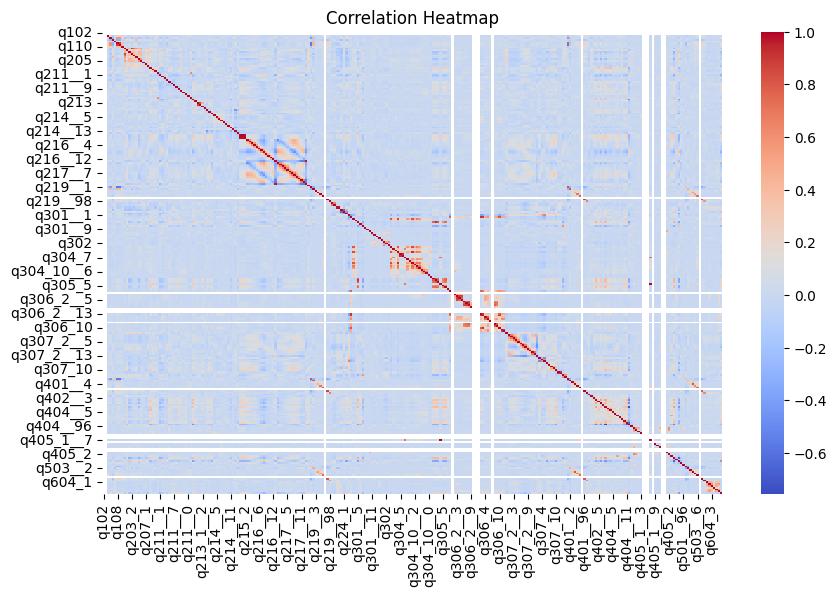

In [16]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

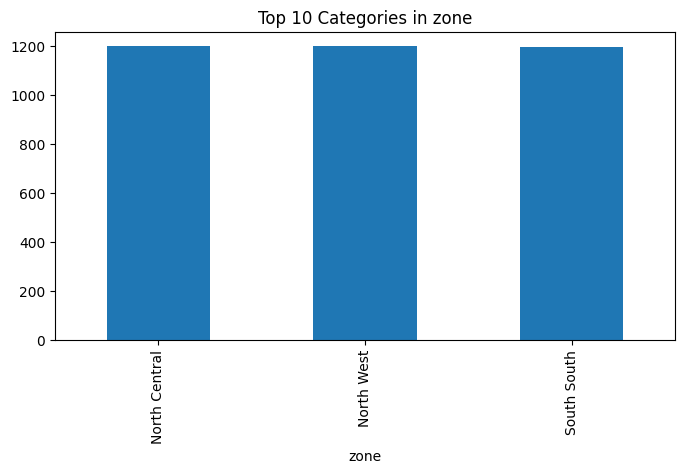

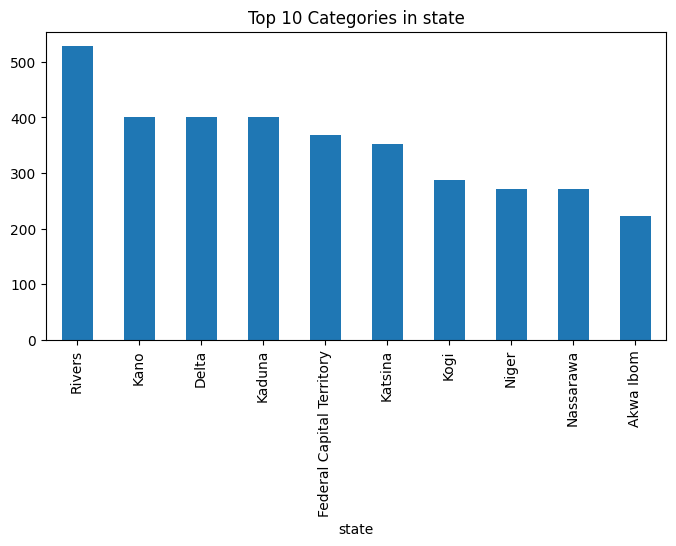

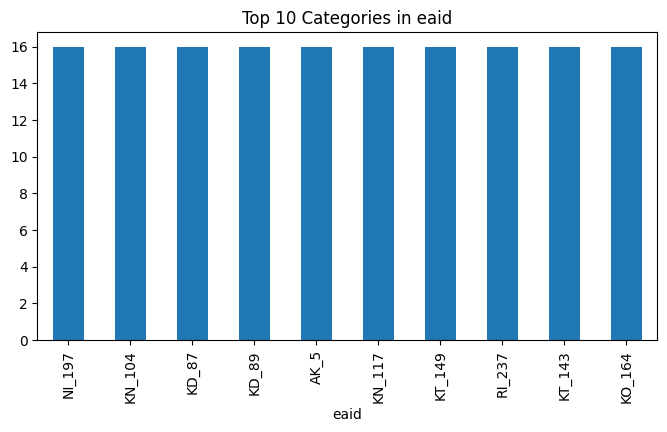

In [17]:
catagorical_df = df.select_dtypes(include=['object']).columns
for col in catagorical_df[:3]:
    plt.figure(figsize=(8,4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top 10 Categories in {col}')
    plt.show()

In [18]:
print(numeric_df.describe().T)

            count      mean        std       min       25%       50%  \
q102       3599.0  1.000000   0.000000  1.000000  1.000000  1.000000   
q103       3599.0  0.000000   0.000000  0.000000  0.000000  0.000000   
q104       3599.0  2.098639   6.920978  1.000000  1.000000  1.000000   
q105       3599.0  1.359822   0.480015  1.000000  1.000000  1.000000   
...           ...       ...        ...       ...       ...       ...   
q604_4     3599.0  2.766324   8.707438  1.000000  1.000000  2.000000   
q604_5     3599.0  3.301473   7.368410  1.000000  2.000000  3.000000   
q604_6     3599.0  3.682134  11.200040  1.000000  2.000000  2.000000   
natweight  3599.0  0.117035   0.080032  0.026126  0.069566  0.094781   

                75%        max  
q102       1.000000   1.000000  
q103       0.000000   0.000000  
q104       2.000000  96.000000  
q105       2.000000   2.000000  
...             ...        ...  
q604_4     3.000000  99.000000  
q604_5     3.000000  99.000000  
q604_6     3.00

## 3) KPI 1 — Electrification Rate (%)

In [19]:
# --- explore ---
electricity_columns = ['q401__1', 'q401__2', 'q401__3', 'q401__4', 'q401__5', 'q401__6']
df['has_electricity'] = df[electricity_columns].any(axis=1).astype(int)
total_households = len(df)
households_with_electricity = df['has_electricity'].sum()
electrification_rate = (households_with_electricity / total_households) * 100
print("⚡ KPI 1 — Electrification Rate (%)")
print(f"Total households: {total_households}")
print(f"Households with electricity access: {households_with_electricity}")
print(f"Electrification Rate: {electrification_rate:.2f}%")

⚡ KPI 1 — Electrification Rate (%)
Total households: 3599
Households with electricity access: 3441
Electrification Rate: 95.61%


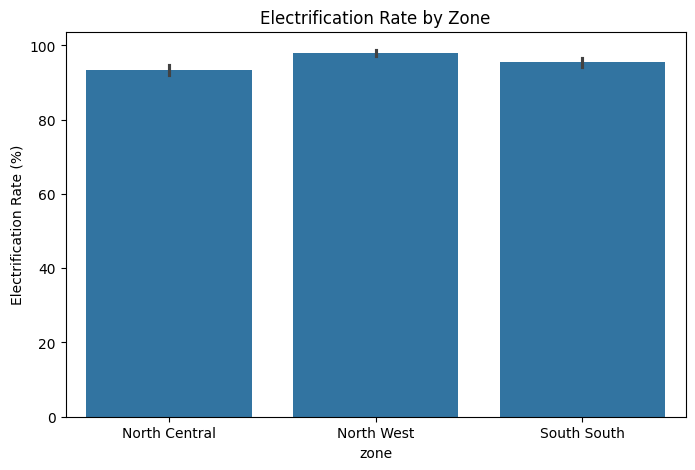

In [20]:
plt.figure(figsize=(8, 5))
sns.barplot(x='zone', y='has_electricity', data=df, estimator=lambda x: sum(x)/len(x)*100)
plt.ylabel('Electrification Rate (%)')
plt.title('Electrification Rate by Zone')
plt.show()

## 4) KPI 2 — Reliability (choose the best available)

In [21]:
# --- explore ---
electricity_columns = ['q401__1', 'q401__2', 'q401__3', 'q401__4', 'q401__5', 'q401__6']
outage_column = 'q402__1'
hours_without_power_column = 'q402__2'

In [22]:
df['has_electricity'] = df[electricity_columns].any(axis=1).astype(int)
connected_households = df[df['has_electricity'] == 1]

In [23]:
df.head()

,zone,state,eaid,lga,urca_cat,hhid,q102,q103,q104,q105,q106,q107,q108,q109,q110,q201,q202,q203_1,q203_2,q203_3,q203_4,q204,q205,q206,q207_1,q207_2,q207_3,q208,q209,q210,q210_1,q211,q211__1,q211__2,q211__3,q211__4,q211__5,q211__6,q211__7,q211__8,q211__9,q211__10,q211__11,q211__12,q211__0,q211__96,q211_1,q212,q212_1,q213,q213_1,q213_1__1,q213_1__2,q213_1__96,q214,q214__1,q214__2,q214__3,q214__4,q214__5,...,q402__5,q402__6,q404,q404__1,q404__2,q404__3,q404__4,q404__5,q404__6,q404__7,q404__8,q404__9,q404__10,q404__11,q404__0,q404__96,q404_1,q405,q405_1,q405_1__1,q405_1__2,q405_1__3,q405_1__4,q405_1__5,q405_1__6,q405_1__7,q405_1__8,q405_1__9,q405_1__10,q405_1__11,q405_1__12,q405_1__13,q405_1__96,q405_2,q501,q501__1,q501__2,q501__3,q501__4,q501__5,q501__96,q503,q503__1,q503__2,q503__3,q503__4,q503__5,q503__6,q503__99,q503__96,q503__98,q503_1,q604_1,q604_2,q604_3,q604_4,q604_5,q604_6,natweight,has_electricity
0,North Central,Niger,NI_197,mashegu,<1hr to small city/town+,d8af8ab5-30ab-4d9f-bfe4-81231dbe5dbf,1,0.0,1,1,36,2,0.0,0.0,0.0,5,4,13,4,1,0,2,8,6,0,2,0,22,14,96,Politics,2 96,0,1,0,0,0,0,0,0,0,0,0,0,0,1,Politics and farming for consumption,1,1.0,1,1,1.0,0.0,0.0,1 11,1,0,0,0,0,...,0,1,2 11,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,0,0,1,0,0,1,1,0,0,0,0,0,0.0,0,0,0,4,2,3,2,3,3,0.039141,1
1,North Central,Niger,NI_197,mashegu,<1hr to small city/town+,e8245d5c-8130-4e78-b4b0-1053b7ecbc9b,1,0.0,1,1,60,2,0.0,0.0,0.0,6,2,4,3,2,1,3,9,6,0,0,0,14,13,1,0,1 3 96,1,0,1,0,0,0,0,0,0,0,0,0,0,1,Farming for consumption,0,0.0,1,1,1.0,0.0,0.0,11,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,0,0,1,0,0,1,1,0,0,0,0,0,0.0,0,0,0,4,2,3,1,3,3,0.039141,1
2,North West,Kano,KN_104,garun_malam,<1hr to large city,435c8e27-517a-46b9-af04-48830e086d7a,1,0.0,1,1,45,1,0.0,0.0,0.0,3,6,3,2,1,0,1,5,6,1,1,0,14,8,2,0,2 8,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1.0,1,1,1.0,0.0,0.0,11,0,0,0,0,0,...,0,1,11,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,0,0,1,0,0,1,1,0,0,0,0,0,0.0,0,0,0,4,3,4,2,4,1,0.109779,1
3,North West,Kano,KN_104,garun_malam,<1hr to large city,9303fa53-9fd2-41a9-9f0d-9567dbe5168e,1,0.0,1,1,47,1,0.0,0.0,0.0,3,15,7,2,1,0,1,10,6,3,1,0,14,8,2,0,2 7,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1.0,0,0,0.0,0.0,0.0,11,0,0,0,0,0,...,1,1,2 11 1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,0,0,1,0,0,1 2,1,1,0,0,0,0,0.0,0,0,0,4,3,4,3,4,2,0.109779,1
4,North West,Kano,KN_104,garun_malam,<1hr to large city,c62cc5a5-29c5-423b-9543-a7b05bda454b,1,0.0,1,1,45,1,0.0,0.0,0.0,2,1,4,1,1,0,2,3,6,0,1,0,24,24,2,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,11,0,0,0,0,0,...,0,0,11,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,0,0,1,0,0,1 2,1,1,0,0,0,0,0.0,0,0,0,4,2,4,2,4,2,0.109779,1


In [24]:
if outage_column in df.columns:
    avg_outages_per_week = connected_households[outage_column].replace(0, pd.NA).mean()
else:
    avg_outages_per_week = None

# Average hours without power per day
if hours_without_power_column in df.columns:
    avg_hours_without_power = connected_households[hours_without_power_column].replace(0, pd.NA).mean()
else:
    avg_hours_without_power = None

print("🔌 KPI 2 — Supply Reliability")
print(f"Total connected households: {len(connected_households)}")
if avg_outages_per_week is not None:
    print(f"Average outages per week: {avg_outages_per_week:.2f}")
if avg_hours_without_power is not None:
    print(f"Average hours without power per day: {avg_hours_without_power:.2f}")

🔌 KPI 2 — Supply Reliability
Total connected households: 3441
Average outages per week: 1.00
Average hours without power per day: 1.00


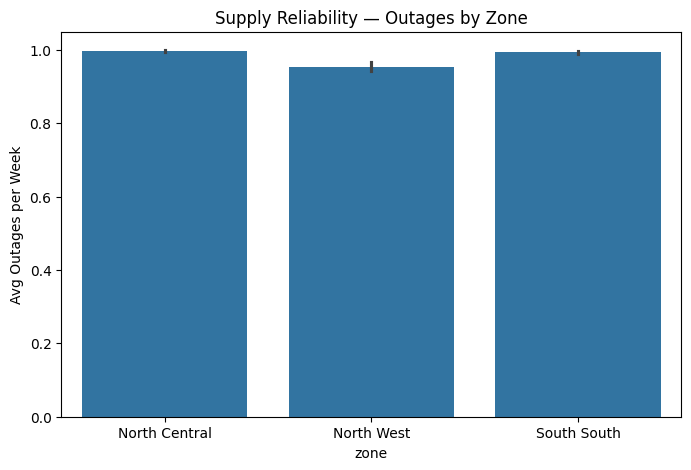

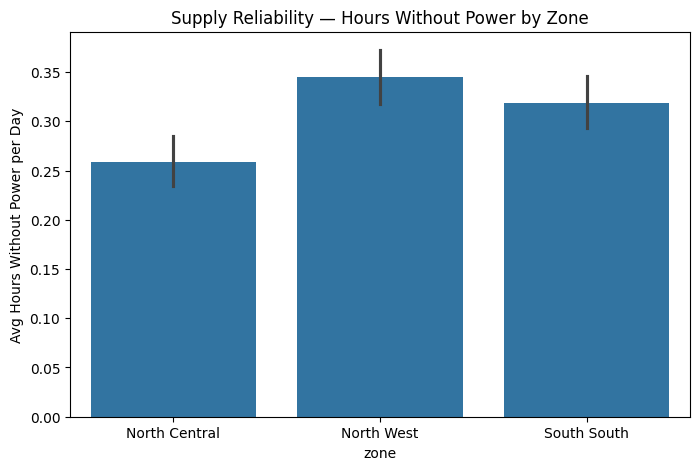

In [25]:
plt.figure(figsize=(8, 5))
sns.barplot(x='zone', y=outage_column, data=connected_households, estimator='mean')
plt.ylabel('Avg Outages per Week')
plt.title('Supply Reliability — Outages by Zone')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='zone', y=hours_without_power_column, data=connected_households, estimator='mean')
plt.ylabel('Avg Hours Without Power per Day')
plt.title('Supply Reliability — Hours Without Power by Zone')
plt.show()

## 5) KPI 3 — Energy Burden (% of total monthly expenditure or income)

In [26]:
# --- explore ---
electricity_exp_col = 'q503__1'
total_exp_or_income_col = 'q604_1'

In [27]:
df = df.copy()
df = df[(df[electricity_exp_col] > 0) & (df[total_exp_or_income_col] > 0)]

In [28]:
df['energy_burden'] = (df[electricity_exp_col] / df[total_exp_or_income_col]) * 100
average_energy_burden = df['energy_burden'].mean()

In [29]:
print("💡 KPI 3 — Energy Burden (%)")
print(f"Total valid households: {len(df)}")
print(f"Average Energy Burden: {average_energy_burden:.2f}%")

💡 KPI 3 — Energy Burden (%)
Total valid households: 2583
Average Energy Burden: 46.68%


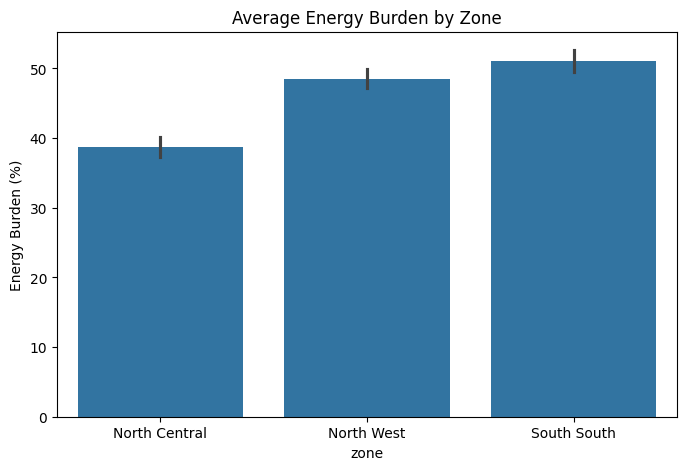

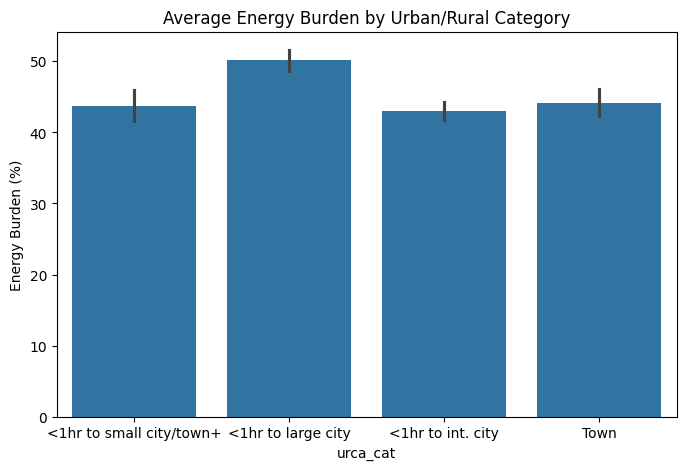

In [30]:
plt.figure(figsize=(8, 5))
sns.barplot(x='zone', y='energy_burden', data=df, estimator='mean')
plt.title('Average Energy Burden by Zone')
plt.ylabel('Energy Burden (%)')
plt.show()

# By urban/rural category (urca_cat)
if 'urca_cat' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='urca_cat', y='energy_burden', data=df, estimator='mean')
    plt.title('Average Energy Burden by Urban/Rural Category')
    plt.ylabel('Energy Burden (%)')
    plt.show()